In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_otsu = pd.read_csv("otsu_vf_ncc.txt", sep = '\t')
df_li = pd.read_csv("li_vf_ncc.txt", sep = '\t')

In [3]:
df_otsu

,batch,slice,method,vf_mask,ncc_mask,vf,ncc,vf_z
0,0,0,UNet,0.334881,34,0.439491,96,0.394914
1,0,1,UNet,0.369518,34,0.441841,71,0.439757
2,0,2,UNet,0.231178,48,0.368977,96,-0.950733
3,0,3,UNet,0.187607,36,0.317516,82,-1.932761
4,1,4,UNet,0.389484,31,0.491283,70,1.383275
5,1,5,UNet,0.350945,31,0.437065,74,0.348615
6,1,6,UNet,0.375519,32,0.463543,58,0.853897
7,1,7,UNet,0.220348,31,0.392841,69,-0.495317
8,2,8,UNet,0.290310,28,0.416615,69,-0.041648


In [4]:
df_li

,batch,slice,method,vf_mask,ncc_mask,vf,ncc,vf_z
0,0,0,UNet,0.245659,37,0.314396,84,0.562234
1,0,1,UNet,0.291855,30,0.290588,96,-0.312717
2,0,2,UNet,0.254322,31,0.332054,78,1.211193
3,0,3,UNet,0.166149,53,0.328312,72,1.073663
4,0,4,UNet,0.248116,30,0.320496,74,0.786405
5,0,5,UNet,0.270237,34,0.282745,110,-0.600956
6,0,6,UNet,0.212132,28,0.281166,75,-0.658996
7,0,7,UNet,0.214085,32,0.278198,65,-0.768068
8,1,8,UNet,0.201965,45,0.315533,79,0.604012
9,1,9,UNet,0.198372,38,0.247486,99,-1.896770


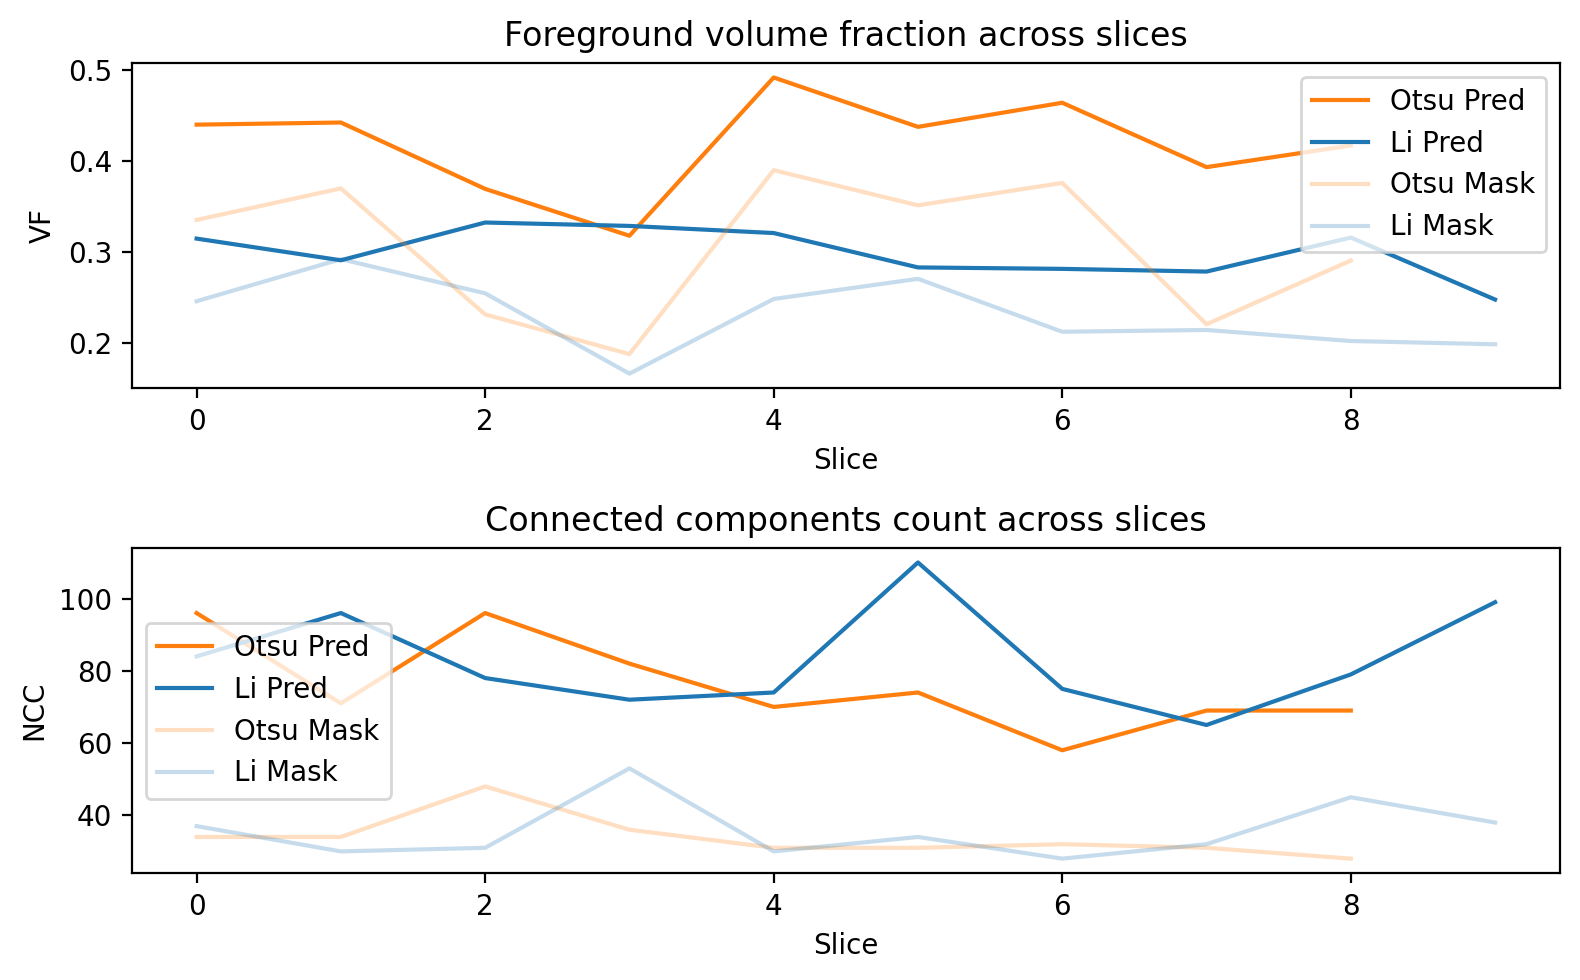

In [5]:
# Cria uma figura com 2 linhas e 1 coluna (um gráfico em cima do outro)
fig, axes = plt.subplots(2, 1, figsize=(8, 5), dpi=200)  # (largura, altura)

# --- Gráfico 1: Volume fraction ---
axes[0].plot(df_otsu["vf"], label="Otsu Pred", color = "#ff7f0e")
axes[0].plot(df_li["vf"], label="Li Pred", color = "#1f77b4")
axes[0].plot(df_otsu["vf_mask"], label="Otsu Mask", color = "#ff7f0e", alpha = 0.25)
axes[0].plot(df_li["vf_mask"], label="Li Mask", color = "#1f77b4", alpha = 0.25)
axes[0].set_title("Foreground volume fraction across slices")
axes[0].set_xlabel("Slice")
axes[0].set_ylabel("VF")
axes[0].legend()

# --- Gráfico 2: Number of component count ---
axes[1].plot(df_otsu["ncc"], label="Otsu Pred", color = "#ff7f0e")
axes[1].plot(df_li["ncc"], label="Li Pred", color = "#1f77b4")
axes[1].plot(df_otsu["ncc_mask"], label="Otsu Mask", color = "#ff7f0e", alpha = 0.25)
axes[1].plot(df_li["ncc_mask"], label="Li Mask", color = "#1f77b4", alpha = 0.25)
axes[1].set_title("Connected components count across slices")
axes[1].set_xlabel("Slice")
axes[1].set_ylabel("NCC")
axes[1].legend()

# Ajusta espaçamento entre os gráficos
plt.tight_layout()
plt.savefig("grafico_elementos.png")
plt.show()
